**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0).
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments.



In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets.

We will work with the first 'real' data sets in the next assignment.

## **Preparation Steps**

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


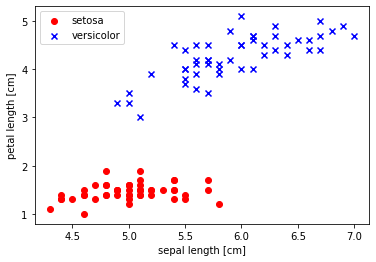

In [ ]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            if errors.sum() == 0:
                break;
            else:
                self.w_[1:] += self.eta * X.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()

                # compute the logistic `loss`
                loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
                self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        #return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1).


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code from the notebook on polynomial regression, generate $X_{d=2}$ and $X_{d=3}$

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 0.1$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases.


### <font color = 'blue'> **Q1-1** - Approach 1 -Process weight update after each data point </font>

In [ ]:
# List out what we know
eta = 0.1 # learning rate
w = np.array([0.1,-0.2,0.1]) # w0=0.1, w1=-0.2, w2=0.1
y_label = np.ones(3) # force y label to be all 1 as the instruction in the addendum
y_label

array([1., 1., 1.])

In [ ]:
# obtain errors for the first data point
dp = 0
x_1 = X[dp][0]
x_2 = X[dp][1]

# calculate net input
y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
print("Netinput = {}".format(y_net_input))

# calculate activation
z = 1/(1 + np.exp(-y_net_input))
print("Activation = {}".format(z))

# Calculate errors
errors = y_label[dp] - z
print("errors = {}".format(errors))

#Update the weight for the first data point
update = eta * errors
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
print("Weights for datapoint {} is = {}".format(X[dp],w))

Netinput = -0.78
Activation = 0.31431988606174616
errors = 0.6856801139382538
Weights for datapoint [5.1 1.4] is = [0.16856801 0.14969686 0.19599522]


In [ ]:
# obtain errors for the second data point
dp = 1
x_1 = X[dp][0]
x_2 = X[dp][1]

# calculate net input
y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
print("Netinput = {}".format(y_net_input))

# calculate activation
z = 1/(1 + np.exp(-y_net_input))
print("Activation = {}".format(z))

# Calculate errors
errors = y_label[dp] - z
print("errors = {}".format(errors))

#Update the weight for the second data point
update = eta * errors
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
print("Weights for datapoint {} is = {}".format(X[dp],w))

Netinput = 1.1764759184574194
Activation = 0.7643135730004393
errors = 0.23568642699956066
Weights for datapoint [4.9 1.4] is = [0.19213665 0.26518321 0.22899132]


In [ ]:
# obtain y hat for the third data point
dp = 2
x_1 = X[dp][0]
x_2 = X[dp][1]

# calculate net input
y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
print("Netinput = {}".format(y_net_input))

# calculate activation
z = 1/(1 + np.exp(-y_net_input))
print("Activation = {}".format(z))

# Calculate errors
errors = y_label[dp] - z
print("errors = {}".format(errors))

#Update the weight for the second data point
update = eta * errors
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
print("Weights for datapoint {} is = {}".format(X[dp],w))

Netinput = 1.7361864390344461
Activation = 0.8502020242725015
errors = 0.14979797572749853
Weights for datapoint [4.7 1.3] is = [0.20711645 0.33558826 0.24846505]


In [ ]:
#Q1-1

# To Cross check the weights with LogisticRegressionGD
# Change to the code
#----Weights to be passed in as a parameter
#----Print the required results to make the output verbose

#-----------Tweak the code of the logisticregression code

class LogisticRegressionGDCheck(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    #***************Set weight as an input parameter for the logisticregression code
    def __init__(self, eta=0.05, n_iter=100, random_state=1,w_=np.asarray([])):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        #----- Added this to test the manual calculation ---#
        self.w_ = w_

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        #self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #self.w_ = np.array([0.1,-0.2,0.1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            print("Iteration {}: Net input = {}".format(i+1,net_input))
            print("Iteration {}: output = {}".format(i+1,output))
            print("Iteration {}: errors = {}".format(i+1,errors))
            print("Iteration {}: weights = {}".format(i+1,self.w_))

            # compute the logistic `loss`
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        #return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

#-----------Tweak the code of the logisticregression code




In [ ]:
# Passing first data point to the given logistic regression class
lr1 = LogisticRegressionGDCheck(eta=0.1,n_iter=1,w_=np.array([0.1,-0.2,0.1]))
lr1.fit(X[0:1],y_label[0:1])

Iteration 1: Net input = [-0.78]
Iteration 1: output = [0.31431989]
Iteration 1: errors = [0.68568011]
Iteration 1: weights = [0.16856801 0.14969686 0.19599522]


In [ ]:
# Passing second data point to the given logistic regression class
lr1 = LogisticRegressionGDCheck(eta=0.1,n_iter=1,w_=np.array([0.16856801, 0.14969686, 0.19599522]))
lr1.fit(X[1:2],y_label[1:2])

Iteration 1: Net input = [1.17647593]
Iteration 1: output = [0.76431358]
Iteration 1: errors = [0.23568642]
Iteration 1: weights = [0.19213665 0.26518321 0.22899132]


In [ ]:
# Passing third data point to the given logistic regression class
lr1 = LogisticRegressionGDCheck(eta=0.1,n_iter=1,w_=np.array([0.19213665, 0.26518321, 0.22899132]))
lr1.fit(X[2:3],y_label[2:3])

Iteration 1: Net input = [1.73618645]
Iteration 1: output = [0.85020203]
Iteration 1: errors = [0.14979797]
Iteration 1: weights = [0.20711645 0.33558826 0.24846506]


#### Weights after processing first datapoint   = [0.16856801 0.14969686 0.19599522]
#### Weights after processing second datapoint   = [0.19213665 0.26518321 0.22899132]
#### Weights after processing third datapoint   = [0.20711645 0.33558826 0.24846506]

### <font color = 'blue'> **Q1-1** - Approach 2 -Process weight update for all 3 data points at once </font>

In [ ]:
# Another Approach - Similar to the original LogisticRegressionGD class
#Processing All 3 datapoints at once

# Create a weight vector for the given initial weights
w = np.array([0.1,-0.2,0.1])
print("Initial Weights = {}".format(w))

# Create a vector with all 3 datapoints x[0:3] from Iris dataset
x1 = X[0:3]
y1 = y_label # setosa label is 1

# Calculate net input for the 3 datapoints
netinput = np.dot(x1, w[1:]) + w[0]
print("Netinput = {}".format(netinput))

# Activation function
z = 1/(1 + np.exp(-netinput))
print("Activation = {}".format(z))

# Calculate errors
errors = y1 - z
print("errors = {}".format(errors))

# Calculate weights
w[0] +=  0.1 * errors.sum()
w[1:] += 0.1 * x1.T.dot(errors)
print("Weights after processing datapoints {} is = {}".format(x1,w))

Initial Weights = [ 0.1 -0.2  0.1]
Netinput = [-0.78 -0.74 -0.71]
Activation = [0.31431989 0.32300414 0.32959884]
errors = [0.68568011 0.67699586 0.67040116]
Weights after processing datapoints [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]] is = [0.30330771 0.79651337 0.37792679]


In [ ]:
# Cross check with the tweaked LogisticRegression Class
lr_crosscheck = LogisticRegressionGDCheck(eta=0.1,n_iter=1,w_=np.array([0.1,-0.2,0.1]))
lr_crosscheck.fit(x1,y1)

Iteration 1: Net input = [-0.78 -0.74 -0.71]
Iteration 1: output = [0.31431989 0.32300414 0.32959884]
Iteration 1: errors = [0.68568011 0.67699586 0.67040116]
Iteration 1: weights = [0.30330771 0.79651337 0.37792679]


#### Weights after processing all 3 datapoints at once  = [0.30330771 0.79651337 0.37792679]

### <font color = 'blue'> **Q1-2** - Generate Quadratic and Cubic features dataset </font>

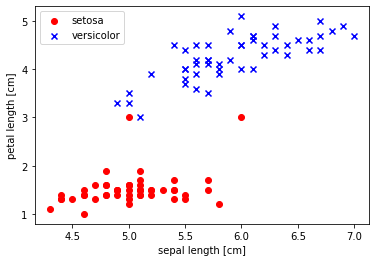

In [ ]:
#As per Professor's suggestions, flipping the values for few to make the linear classification
#have some loss instead of showing Nan
X[4] = [6. , 3]
X[5] = [5. , 3]
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
#Q1-2:

# Give the data X
from sklearn.preprocessing import PolynomialFeatures

# Generate Quadratic features
quadratic = PolynomialFeatures(degree=2)
X_d2 = quadratic.fit_transform(X)

# Generate Cubic features
cubic = PolynomialFeatures(degree=3)
X_d3 = cubic.fit_transform(X)

print(X.shape)
print(X_d2.shape)
print(X_d3.shape)

(100, 2)
(100, 6)
(100, 10)


In [ ]:
#Q1-2: spot check data for quadratic features
X_d2[0:3]

array([[ 1.  ,  5.1 ,  1.4 , 26.01,  7.14,  1.96],
       [ 1.  ,  4.9 ,  1.4 , 24.01,  6.86,  1.96],
       [ 1.  ,  4.7 ,  1.3 , 22.09,  6.11,  1.69]])

In [ ]:
#Q1-2: spot check data for cubic features
X_d3[0:3]

array([[  1.   ,   5.1  ,   1.4  ,  26.01 ,   7.14 ,   1.96 , 132.651,
         36.414,   9.996,   2.744],
       [  1.   ,   4.9  ,   1.4  ,  24.01 ,   6.86 ,   1.96 , 117.649,
         33.614,   9.604,   2.744],
       [  1.   ,   4.7  ,   1.3  ,  22.09 ,   6.11 ,   1.69 , 103.823,
         28.717,   7.943,   2.197]])

### <font color = 'blue'> **Q1-3** - Fit datasets using the given Logistic Regression classifier </font>

Check if d increases, loss value decreases.

In [ ]:
#Using LogisticRegressionGD fit  x_gen, y_gen

lr = LogisticRegressionGD(eta=0.00001,n_iter=100)

# fit original dataset
lr.fit(X,y)
lr.loss_[99]

65.55018492404088

In [ ]:
# fit quadratic features dataset
pr2 = LogisticRegressionGD(eta=0.00001,n_iter=100)
pr2.fit(X_d2, y)
pr2.loss_[99]

20.59519232205817

In [ ]:
# fit cubic features dataset
pr3 = LogisticRegressionGD(eta=0.00001, n_iter=100)
pr3.fit(X_d3, y)
pr3.loss_[99]

2.453262037673321

<b> Observation </b>
    <br>

Based on the output of the loss for the three datasets original, quadratic and cubic, we can infer that the loss starts to decrease as we introduce higher dimensions of the features. This proves that introducing higher dimensions of the features will help find a model that would best fit the data.

But additional measures needs to be taken that it does not result in overfitting of the training data. Cross validation may help overcome this.
    


In [ ]:
# Grader's area

maxScore = maxScore +12
M[1,1] = 4
M[1,2] = 4
M[1,3] = 4

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question 1(iii).

<br>

Suppose $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$ where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [Note: as with anything else, feel free to discuss this on Canvas]

(your answer goes here)

<b> Solution </b>
    <br>


$f_1$ is a model that optimally fits the data $(X,y)$. The hyperplane equation in this case would be

$$
     y = c + b x
$$
(Assuming one feature)

Loss function MSE in this case would be
$$
     E = \frac{1}{n} \sum_{i=0}^n  \left( y_i -  \hat{y}_i\right) ^2
$$
$$
     E = \frac{1}{n} \sum_{i=0}^n  \left( y_i - (b x + c) \right) ^2
$$


----------------------
$f_2$ is another model that optimally fits the data $(X_2,y)$
The equation of the hyperplane in this case is

$$
    y = c + b x + a x^2
$$

Loss function MSE in this case would be
$$
     E = \frac{1}{n} \sum_{i=0}^n  \left( y_i -  \hat{y}_i\right) ^2
$$

$$
     E = \frac{1}{n} \sum_{i=0}^n  \left( y_i - (a x^2 + b x + c) \right) ^2
$$

----------------------
Comparing both the loss functions we can see that the f2 loss function has the addtional component a X ^ 2. Lets assume that a = 0, then loss of f2 is same as that of f1. So f2's loss is atleast equal to f1's loss even is the a coefficient becomes 0.

In [ ]:
# Grader's area

maxScore = maxScore + 4
M[2,1] = 4


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **negative**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br>

**a.** the data set is linearly separable  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes, i.e. it gives a very big margin to the one of the two classes and very small margin for the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

**Hint**: Try small datasets.
**Note**: It's best to use fresh variables for your dataset, because the previous $X,y$ are re-used in question 4.


<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>

In [ ]:
# To generate dataset, Iris dataset is reduced to pick first and last few points
# Also modify few datapoints
y1 = df.iloc[0:5, 4].values
y1 = np.where(y1 == 'Iris-setosa', 1, 0)

y2 = df.iloc[50:55, 4].values
y2 = np.where(y2 == 'Iris-setosa', 1, 0)

# extract sepal length and petal length
X1 = df.iloc[:5, [0, 2]].values

# extract sepal length and petal length
X2 = df.iloc[50:55, [0, 2]].values

X1[4] = [5. , 3.2]

In [ ]:
y_gen = np.hstack((y1,y2))

In [ ]:
x_gen = np.vstack((X1,X2))

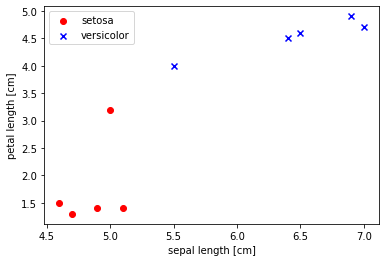

In [ ]:
# plot generated data
plt.scatter(x_gen[:5, 0], x_gen[:5, 1],
            color='red', marker='o', label='setosa')
plt.scatter(x_gen[5:10, 0], x_gen[5:10, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>

In [ ]:
#Using LogisticRegressionGD fit  x_gen, y_gen
lr_gen = LogisticRegressionGD(eta=0.01, n_iter=1000)

# fit generated dataset
lr_gen.fit(x_gen,y_gen)

print("Weights for the logistic neuron : {}".format(lr_gen.w_))

Weights for the logistic neuron : [ 2.12390521  1.94419197 -3.76702042]


<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

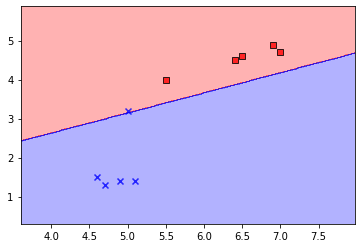

In [ ]:
plot_decision_regions(x_gen, y_gen, lr_gen)

<b>Observation: </b>
<br>
The above plot shows that although the dataset is linearly separable and the hyperplane separates the two classes, but the boundary is not fair. The margin for the red point is more.

In [ ]:
# Grader's area

maxScore = maxScore + 12
M[3,1] = 4
M[3,2] = 4
M[3,3] = 4


<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

In [ ]:
# Modify dataset above to make the default implementation fail
x_gen[4] = [5. , 4.5]

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit the modified dataset C=1 (default)
lr_d = LogisticRegression()
lr_d.fit(x_gen,y_gen)

LogisticRegression()

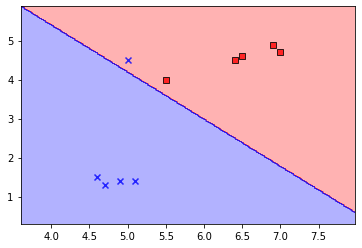

In [ ]:
# Below plot shows the default implmentation fails to classify one point
plot_decision_regions(x_gen, y_gen, lr_d)

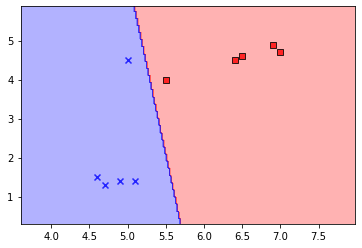

In [ ]:
# fit the modified dataset with C=100, this classifies all points correctly
lr_n = LogisticRegression(C=100)
lr_n.fit(x_gen,y_gen)

plot_decision_regions(x_gen, y_gen, lr_n)

In [ ]:
# Grader's area
maxScore = maxScore + 4

M[3,4] = 4

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in above cells is linearly separable.

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization, i.e. it incentivizes very small slacks.

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$, $s = ||w||_2$.
[Hint: Read the documentation in order to access the coefficients]

<font color = 'blue'> **Q4-3.** </font> Set $w = w/s$ and $b=b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values, let $\gamma$ be the smallest one in absolute value. This $\gamma$ is the margin (in fact there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$).


**Note:** as with anything else, feel free to discuss this on Canvas.

### <font color = 'blue'> **Q4-1** - Fit Iris dataset using LinearClassifier </font>


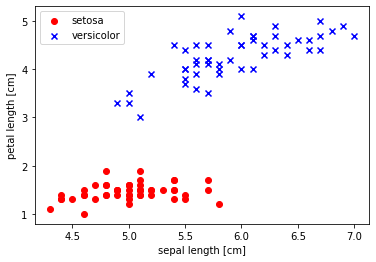

In [ ]:
# Recreating the X and Y variables as there were modifications to the dataset in between.

# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

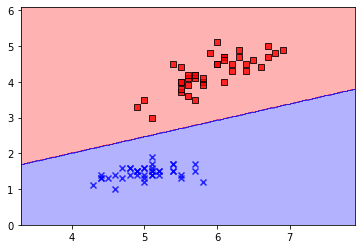

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

# fit dataset using LinearSVC
lrSVC = LinearSVC(C=1)
lrSVC.fit(X_train, y_train)
plot_decision_regions(X_train,
                      y_train,
                      classifier=lrSVC)


In [ ]:
##### Check all the default values
lrSVC.get_params()

{'C': 1,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

{'C': 0.0001, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}
Weights: [[-0.00361 -0.01123]]
Score: 0.5


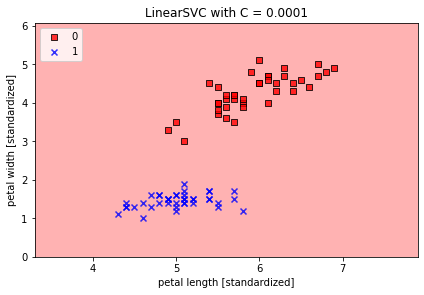

{'C': 0.001, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}
Weights: [[-0.0361 -0.1123]]
Score: 0.5


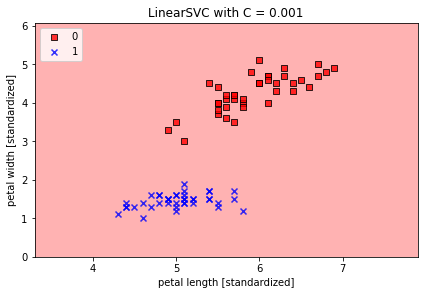

{'C': 0.005, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}
Weights: [[ 0.09389567 -0.34806196]]
Score: 0.75


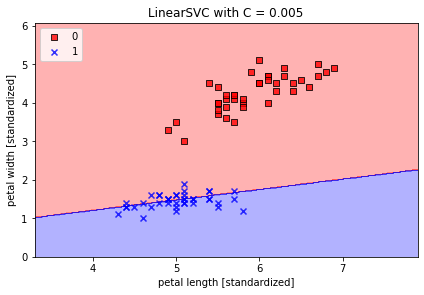

{'C': 0.01, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}
Weights: [[ 0.28099127 -0.62050655]]
Score: 1.0


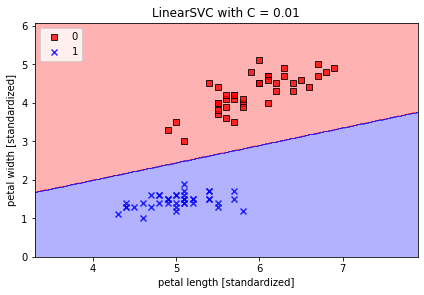

In [ ]:
# Plot decision boundary for the lrSVC classifier to check if all datapoints are correctly classified
#plot_decision_regions(X, y, lrSVC, resolution=0.02)

# Initializing a vector to test different C Values and find minimum value that can correctly classify all datapoints.
# As when C^-1 is big , optimization incentivizes smaller weights
C_in = [0.0001,0.001,0.005,0.01]

for i in C_in:
    lrSVC=LinearSVC(C=i,loss = 'hinge',random_state=1)
    lrSVC.fit(X_train, y_train)
    print(lrSVC.get_params())
    print("Weights: {}".format(lrSVC.coef_))
    print("Score: {}".format(lrSVC.score(X_test,y_test)))
    plot_decision_regions(X_train,
                      y_train,
                      classifier=lrSVC)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title('LinearSVC with C = '+str(i))
    #plt.savefig('images/03_11.png', dpi=300)
    plt.show()


<b> Observation: </b>
By default, C parameter has a value of 1 for LinearSVC. If C parameter is low, penalty given to misclassification is less and hence at C=0.0001, all the points are misclassified and regularization is high in this case.
<br>
With C = 0.01, we can see that all points are correctly classified and with C being still low, we could get a maximum margin hyperplane separating the classes.

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$, $s = ||w||_2$.
[Hint: Read the documentation in order to access the coefficients]

In [ ]:
# Choosing C as 0. as that gives the max weights an
lrSVC=LinearSVC(C=0.01,loss = 'hinge')
lrSVC.fit(X, y)

# To get weights assigned to the features

print("Weights assigned to the features : w1 = {} , w2 = {} ".format(lrSVC.coef_[0][0],lrSVC.coef_[0][1] ))
w = lrSVC.coef_[0]

Weights assigned to the features : w1 = 0.3306731482688406 , w2 = -0.7037301398804389 


In [ ]:
# To get the intercept
print("Intercept : {}".format(lrSVC.intercept_[0]))
b = lrSVC.intercept_[0]

Intercept : 0.12921418119283123


In [ ]:
# Calculate 2-norm of w
s = np.linalg.norm(w)
print(s)

0.7775479668561732


<font color = 'blue'> **Q4-3.** </font> Set $w = w/s$ and $b=b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

In [ ]:
w = w/s
b = b/s

In [ ]:
print("New weights : {}".format(w))
print("New intercept : {}".format(b))

New weights : [ 0.42527685 -0.90506331]
New intercept : 0.1661816205568352


<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values, let $\gamma$ be the smallest one in absolute value. This $\gamma$ is the margin (in fact there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$).


In [ ]:
X.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7],
       [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
        4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5.

In [ ]:
minimum_absolue = np.min(np.abs(np.dot(w, X.T)-b ))
print("minimum_absolue: {}".format(minimum_absolue))

minimum_absolue: 0.15552695123584384


In [ ]:
Xpos = np.dot(w, X[:50].T) - b

In [ ]:
np.sort(Xpos)

array([0.15552695, 0.28311001, 0.38451826, 0.42704595, 0.42704595,
       0.43249691, 0.43794787, 0.46412267, 0.51210132, 0.51210132,
       0.51210132, 0.52300324, 0.52300324, 0.5284542 , 0.5284542 ,
       0.554629  , 0.56007996, 0.56007996, 0.56007996, 0.57098189,
       0.59170572, 0.59170572, 0.60260765, 0.60805861, 0.60805861,
       0.64513533, 0.64513533, 0.64513533, 0.65058629, 0.65603726,
       0.66693918, 0.68766302, 0.68766302, 0.69311398, 0.69311398,
       0.71928878, 0.7301907 , 0.73564166, 0.73564166, 0.77271839,
       0.77271839, 0.77816935, 0.78362031, 0.87412664, 0.88502856,
       0.90030144, 0.9057524 , 0.95373105, 0.99625873, 1.21434812])

In [ ]:
Xneg = np.dot(w, X[50:99].T) -b
np.sort(np.abs(Xneg))

array([0.71245964, 0.90982519, 1.02650632, 1.0428592 , 1.069034  ,
       1.17589322, 1.19224611, 1.20751898, 1.22932283, 1.23477379,
       1.26639955, 1.29910532, 1.3143782 , 1.31982916, 1.33618205,
       1.34163301, 1.41033549, 1.42123742, 1.44304126, 1.44741222,
       1.44741222, 1.45831414, 1.46921606, 1.48448894, 1.49539086,
       1.51719471, 1.52264567, 1.54336951, 1.54336951, 1.56517336,
       1.57062432, 1.58589719, 1.60225008, 1.61860296, 1.66658161,
       1.68730545, 1.68730545, 1.7352841 , 1.74073506, 1.80943754,
       1.8148885 , 1.82579043, 1.82579043, 1.84214331, 1.85741619,
       1.92174772, 1.94247156, 2.00135213, 2.23034344])

Checking if the minimum absolute value (gamma) satisfies $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$.
But the value 0.16 does not satisfy. Hence choosing 0.7 as gamma which is the minimum that matches between the two classes.

In [ ]:
margin = round(np.min(np.abs(Xneg)),2)
print("Margin: {}".format(margin))

Margin: 0.71


In [ ]:
# Grader's area

maxScore = maxScore + 16
M[4,1] = 2
M[4,2] = 3
M[4,3] = 4
M[4,4] = 3


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use $\gamma$ calculated in question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it (I expect that this can be done on Canvas).

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} ||x||_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm.

<font color = 'blue'> **Q5-2.** </font> Calculate $maxErrors = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences.

<font color = 'blue'> **Q5-3.** </font> Compare $maxError$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from assignment 2, or anything else that can provide you with that number].  




In [ ]:
### Solution ####

<font color = 'blue'> **Q5-1.**  </font> Find R (max 2-norm of the dataset)

In [ ]:
x_norm = []

for x in X:
    norm = np.linalg.norm(x)
    x_norm.append(norm)

R = np.max(x_norm)
print("Max Norm R = {}".format(R))

Max Norm R = 8.462860036654275


<font color = 'blue'> **Q5-2.** </font> Calculate $maxErrors$

In [ ]:
maxErrors = (R/margin)**2
print("maxErrors = {}".format(maxErrors))

maxErrors = 142.07498512199965


<font color = 'blue'> **Q5-3.** </font> Compare $maxError$ with the actual number of errors from Perceptron

In [ ]:
# Perceptron class (copied from Assignment 2)
import copy

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    ## grader note: the following solution uses an additional init_weight attribute
    ## this is optional

    def __init__(self, eta=0.01, n_iter=50, random_state=1, init_weight=[]):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

        # to force some preset init weight vector
        self.init_weight = init_weight


        # the number of iterations required to converge
        # it will take the default value = -1
        # grader note: something similar is needed in the solution
        self.iter_trained = -1



    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        if len(self.init_weight)>0:
            self.w_ = self.init_weight
        else:
            rgen = np.random.RandomState(self.random_state)
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # **** (iii)  solution here
        # weight vector over time. A dictionary that will have the key to be the iteration number and the value to be the list of weights after processing each data point
        self.wo_ = {}

        for i in range(self.n_iter):
            errors = 0
            # initiate the list of weight over each data point
            self.wo_[i] = []

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update

                # **** check this: deep copy is required
                # use deep copy to ensure variable is saved by value for historical weight
                self.wo_[i].append(copy.deepcopy(self.w_))
                errors += int(update != 0.0)
            self.errors_.append(errors)

            # **** (i) solution here
            # check to see if during the epoch, if there is any weight change/error.
            # if there is no error, we can break out of the loop since no
            # futher training iteration is necessary
            if errors == 0:
                # (ii) number of iterations for complete training
                # add 1 because python index start from 0
                self.iter_trained = i + 1
                break # end early

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [ ]:
# Reduced the ETA to check if we are getting errors greater than maxError. But the max seems to be 100.
ppn = Perceptron()
ppn.fit(X,y)
maxPerceptronErr = np.max(ppn.errors_)
print("Perceptron max errors for eta=0.00001 : {}".format(maxPerceptronErr))

Perceptron max errors for eta=0.00001 : 3


In [ ]:
# Reduced the ETA to check if we are getting errors greater than maxError. But the max seems to be 100.
ppn = Perceptron(eta=0.0000001,n_iter=1000)
ppn.fit(X,y)
maxPerceptronErr = np.max(ppn.errors_)
print("Perceptron max errors for eta=0.0000001 : {}".format(maxPerceptronErr))

Perceptron max errors for eta=0.0000001 : 50


<b> Observation: </b> <br>
For the iris dataset, comparing the max errors from perceptron with maxErrors calculated using the formula  $maxErrors = R/\gamma^2$,  max errors from the Perceptron is  lesser than the maxErrors we got using $maxErrors = R/\gamma^2$.

In [ ]:
# Grader's area

maxScore = maxScore + 12
M[5,1] = 4
M[5,2] = 3
M[5,3] = 4



----------------------------
----------------------------
----------------------------

In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore

In [ ]:
score

91.66666666666667